<a href="https://colab.research.google.com/github/lukasz86s/Machine_learning/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets.fashion_mnist import load_data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(precision=4, suppress=True, linewidth=350)
pd.options.display.float_format = lambda x: f'{x:.6f}'

In [ ]:
(x_train, y_train), (x_test, y_test)= load_data()
fasion_classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

4431872/4422102 [==============================] - 0s 0us/step


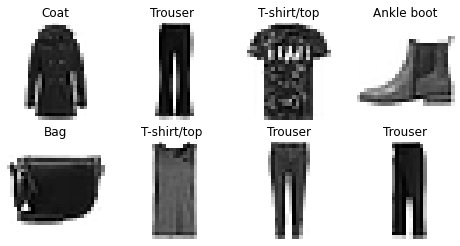

In [ ]:
#showing random samples
plt.figure(figsize=(8, 4))
for i in range(1, 9):
  plt.subplot(2, 4, i)
  index = np.random.randint(x_train.shape[0])
  plt.imshow(x_train[index], cmap='gray_r')
  plt.axis('off')
  plt.title(fasion_classes[y_train[index]])
plt.show()

In [ ]:
#convert
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[0]

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0039, 0.    , 0.    , 0.051 , 0.2863, 0.    , 0.    , 0.0039, 0.0157, 0.    , 0.    , 0.    , 0.    , 0.0039, 0.0039, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.  

In [ ]:
from tensorflow.keras.regularizers import l2
#bulding model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=32, activation='relu' ))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7204 - accuracy: 0.7444 - val_loss: 0.4759 - val_accuracy: 0.8292
Epoch 2/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4985 - accuracy: 0.8212 - val_loss: 0.4130 - val_accuracy: 0.8503
Epoch 3/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4627 - accuracy: 0.8341 - val_loss: 0.4177 - val_accuracy: 0.8502
Epoch 4/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4379 - accuracy: 0.8431 - val_loss: 0.3936 - val_accuracy: 0.8583
Epoch 5/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4236 - accuracy: 0.8462 - val_loss: 0.3814 - val_accuracy: 0.8621
Epoch 6/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4113 - accuracy: 0.8508 - val_loss: 0.3763 - val_accuracy: 0.8643
Epoch 7/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3980 - accuracy: 0.8552 - val_loss: 0.3807 - val_accuracy:

In [ ]:
history = pd.DataFrame(history.history)

In [ ]:
history

,loss,accuracy,val_loss,val_accuracy
0,0.720378,0.744438,0.475894,0.829167
1,0.498547,0.821229,0.413044,0.850333
2,0.462664,0.834125,0.417671,0.850167
3,0.437942,0.843083,0.393632,0.858250
4,0.423593,0.846187,0.381362,0.862083
5,0.411274,0.850792,0.376349,0.864333
6,0.397967,0.855167,0.380749,0.863250
7,0.392121,0.857375,0.369743,0.869417
8,0.385288,0.859375,0.369742,0.867750
9,0.379039,0.860396,0.363093,0.870750


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.val_accuracy, name='val_acc'))
fig.add_trace(go.Scatter(y=history.val_loss, name='val_loss'))
fig.add_trace(go.Scatter(y=history.loss, name='loss'))
fig.add_trace(go.Scatter(y=history.accuracy, name='acc'))
fig.update_layout()
fig.show()

In [ ]:
model.save('model_32_16_epochs_25.h5')

In [ ]:
pred_proba = model.predict(x_test)
pred = pred_proba.argmax(axis=-1)

In [ ]:
df = pd.DataFrame({'y': y_test, 'pred': pred})

In [ ]:
pred_err = df[df.y != df.pred]
idx_err = pred_err.index.copy()
pred_err = pred_err.reset_index(drop=True)
pred_err['err_index'] = idx_err


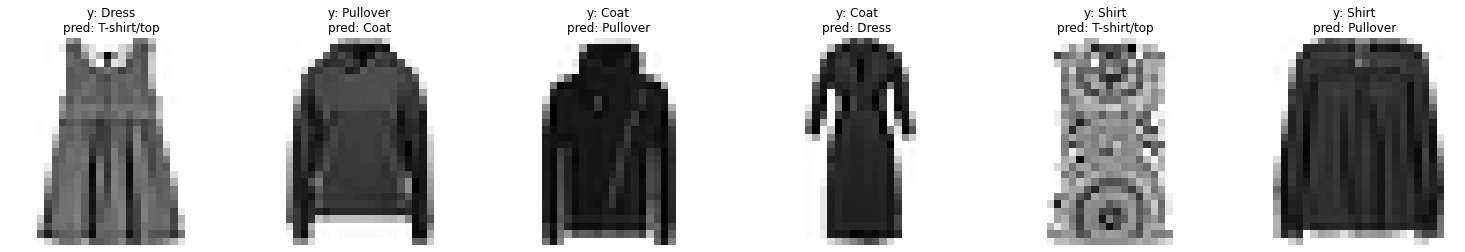

In [ ]:
from plotly.subplots import  make_subplots
fig = make_subplots(cols=6)
plt.figure(figsize=(26, 6))
for i in range(1, 7):
  plt.subplot(1, 6, i,)
  rand_index = np.random.randint(pred_err.shape[0])
  err_index = pred_err.err_index.iloc[rand_index]
  plt.imshow(x_test[err_index], cmap='gray_r', )
  plt.axis('off')
  plt.title(f'y: {fasion_classes[pred_err.y.iloc[rand_index]]}\npred: {fasion_classes[pred_err.pred.iloc[rand_index]]}')
  fig.add_trace(go.Bar(x=fasion_classes, y=pred_proba[err_index]), row=1, col=i)

plt.show()
fig.update_layout(width=1600)